# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

df = pd.read_csv('human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [2]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
print((mean, std))

(98.24923076923078, 0.7303577789050377)


## 1. Is the distribution of body temperatures normal?

<IPython.core.display.Javascript object>


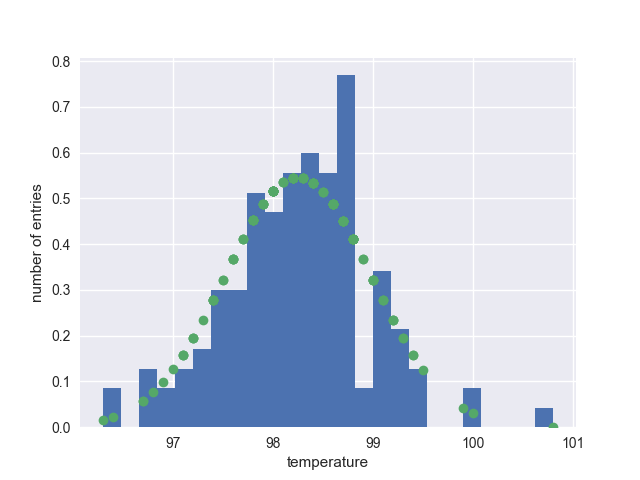

In [3]:
plt.figure()
temp_hist = plt.hist(df['temperature'], bins = 25, normed = True)
normfit=stats.norm.pdf(df['temperature'], mean, std)
plt.plot(df['temperature'], normfit, 'o')
temp_hist = plt.xlabel('temperature')
temp_hist = plt.ylabel('number of entries')

The histogram looks vaguely normal, but we will try scipy's normality test which uses Pearson's chi-squared test. This is a useful test since this distribution does not appear to have Kurtosis risk.

In [4]:
k2, p = stats.normaltest(df['temperature'])
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The sample is likely not normally distributed")
else:
    print("The sample is likely normally distributed")

p = 0.258748
The sample is likely normally distributed


We can also use the method from Datacamp.

<IPython.core.display.Javascript object>


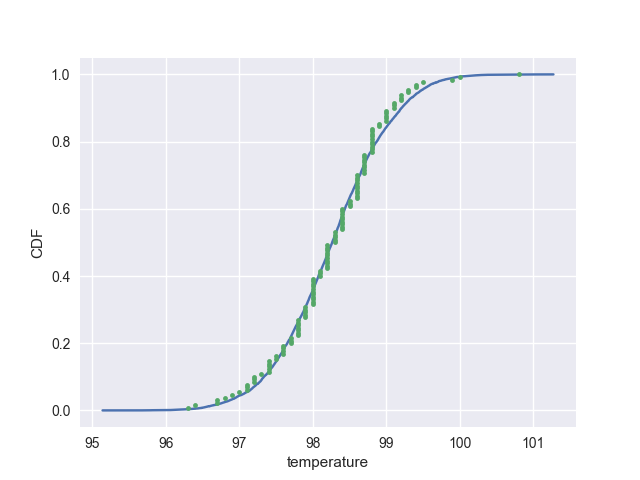

In [5]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

plt.figure()
samples = np.random.normal(mean, std, size = 10000)
x,y = ecdf(df['temperature'])
x_theory, y_theory = ecdf(samples)

sns.set()
cdf = plt.plot(x_theory,y_theory)
cdf = plt.plot(x,y, marker = '.', linestyle = 'none')
cdf = plt.xlabel('temperature')
cdf = plt.ylabel('CDF')
plt.show()

## 2. Is the sample size large? Are the observations independent?

In [6]:
n = len(df['temperature'])
print(n)

130


This question seems poorly asked. Is the sample refered to the 130 data points in the dataframe? In which case it's not knowable unless we know how those 130 observations were collected. In particular, we don't know if they were observations were drawn with replacement.

Though, 130 is greater than 30, so the sample seems large enough.

## 3. Is the true population mean really 98.6 degrees F?
This functions as our null hypothesis. That the true population mean that the dataset sampled is 98.6

We begin with a bootstrap test.

In [7]:
estimate_mean = 98.6
    
temp_shifted = df['temperature'] - np.mean(df['temperature']) + estimate_mean
def diff_from_est(data, estimate_mean = 98.6):
    return np.mean(data) - estimate_mean

diff_obs = diff_from_est(df['temperature'])
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

bs_replicates = draw_bs_reps(temp_shifted,diff_from_est,size = 10000)
p_value = np.sum(bs_replicates <= diff_obs) / 10000
p_value

0.0

with a p value of 0, which means none of our simulated data sets had a mean that was that different from 98.6 and we reject the null hypothesis from this test. So we move on to frequentist tests. In these cases, as in the bootstrap test, we will use a one-sample test, we will also use a z-statistic

In [11]:
error=std/(n**0.5)
z_val=diff_obs/error
z_val

-5.475925202078116

Thus we have that the observed mean is more than 5 standard error less than 98.6, this is pretty extreme. And we see the corresponding p value is very small

In [12]:
p_value=stats.norm.cdf(z_val) * 2 # two sided
p_value

4.3523151658821886e-08

In [13]:
if p_value<0.05:
    print('True Population Mean is NOT 98.6 F')
else:
    print('True Population mean is 98.6 F.')

True Population Mean is NOT 98.6 F


So, we have a similar conclusion as the bootstrap test. 

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t
  and  z
  statistic?

In [14]:
drawn_sample = np.random.choice(df['temperature'], size = 10)
drawn_sample

array([ 100. ,   99.3,   97.6,   98.1,   98.1,   97.8,   98.6,   97.2,
         98.6,   99. ])

In [16]:
error_sam=np.std(drawn_sample)/(10**0.5)
z_sam=(np.mean(drawn_sample)-98.6)/error_sam
z_sam

-0.67088423475271819

In [42]:
p_value_sam=stats.norm.cdf(z_sam) * 2
p_value_sam

0.50229428029303791

In [43]:
if p_value_sam<0.05:
    print('True Population Mean is NOT 98.6 F')
else:
    print('True Population mean is 98.6 F.')

True Population mean is 98.6 F.


## 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

Another frustrating question. Is this simply the confidence interval of the original dataset? or of bootstrapped means?

In [34]:
#func(np.random.choice(data, size=len(data)))
bs_repl_1 = draw_bs_reps(df['temperature'],np.mean,10000)
conf_int = np.percentile(bs_repl_1,[2.5,97.5])
conf_int

array([ 98.12153846,  98.37615385])

Thus, we can see that 98.6 is outside the normal range if we look at the confidence interval of the bootstrapped means.

In [38]:
critical_z=stats.norm.ppf(0.975)
marg_err=std*critical_z/np.sqrt(n)
conf_int_1 = mean + np.array([-1, 1]) * marg_err
conf_int_1

array([ 98.12368211,  98.37477943])

In [37]:
critical_t=stats.t.ppf(1-0.025, n-1)
marg_t=critical_t*std/np.sqrt(n)
conf_int_2 = mean + np.array([-1, 1]) * marg_t
conf_int_2

array([ 98.12249319,  98.37596835])

For both frequentist tests also we have 98.6 being well outside the confidence interval.

## 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

We will use a bootstrapped approach since the frequentists approaches have much different results in the n=10 variant.

Our Hypothesis is that there is no difference between means for men and women.

In [56]:
men_df=df[df.gender=='M']
women_df=df[df.gender=='F']

print(women_df.describe())
print(men_df.describe())

       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000
       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000


In [65]:
#men_shifted = men_df['temperature'] - np.mean(men_df['temperature']) + mean
#women_shifted = women_df['temperature'] - np.mean(women_df['temperature']) + mean
empirical_diff_means = np.mean(men_df['temperature']) - np.mean(women_df['temperature'])

bs_replicates_men = draw_bs_reps(men_df['temperature'], np.mean, 10000)
bs_replicates_women = draw_bs_reps(women_df['temperature'], np.mean, 10000)

bs_repl_diff = bs_replicates_men - bs_replicates_women
p = np.sum(bs_repl_diff >= empirical_diff_means)/len(bs_repl_diff)
p

0.50270000000000004

Since p is quite high we can confirm the null hypothesis that there is no difference.